In [4]:
# This file is used for data exploration as well as the actual model.
# The code for the model can be found in the later half of this file.
# Coded with Google Colaboratory.

import time
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#import file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

df_train = pd.read_csv('/content/drive/MyDrive/Projects/Data/Student Performance/student_data.csv', header=0)
#df_train = pd.read_csv('student_data.csv', header=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Change categorical data to numeric
df_train['school'].replace(to_replace=['GP', 'MS'], value=[0, 1], inplace=True)
df_train['sex'].replace(to_replace=['M', 'F'], value=[0, 1], inplace=True)
df_train['famsize'].replace(to_replace=['GT3', 'LE3'], value=[0, 1], inplace=True)
df_train['Mjob'].replace(to_replace=['at_home', 'health', 'other', 'services', 'teacher'], value=[0, 1, 2, 3, 4], inplace=True)
df_train['Fjob'].replace(to_replace=['at_home', 'health', 'other', 'services', 'teacher'], value=[0, 1, 2, 3, 4], inplace=True)
df_train['Pstatus'].replace(to_replace=['A', 'T'], value=[0, 1], inplace=True)
df_train['address'].replace(to_replace=['U', 'R'], value=[0, 1], inplace=True)
df_train['reason'].replace(to_replace=['course', 'other', 'home', 'reputation'], value=[0, 1, 2, 3], inplace=True)
df_train['guardian'].replace(to_replace=['mother', 'father', 'other'], value=[0, 1, 2], inplace=True)
df_train['schoolsup'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)
df_train['famsup'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)
df_train['paid'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)
df_train['activities'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)
df_train['nursery'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)
df_train['higher'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)
df_train['internet'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)
df_train['romantic'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)

#Create new data set with enumerated values
train = df_train[['sex', 'famsize', 'Mjob', 'Fjob', 'guardian',
                  'paid', 'activities', 'internet', 'Medu', 'Fedu', 'studytime', 'failures', 
                  'famrel', 'health', 'absences', 'G1', 'G2', 'G3']]

#Check if all data is numerical
for col in df_train:
  print(col, ": ", df_train[col].unique())

school :  [0 1]
sex :  [1 0]
age :  [18 17 15 16 19 22 20 21]
address :  [0 1]
famsize :  [0 1]
Pstatus :  [0 1]
Medu :  [4 1 3 2 0]
Fedu :  [4 1 2 3 0]
Mjob :  [0 1 2 3 4]
Fjob :  [4 2 3 1 0]
reason :  [0 1 2 3]
guardian :  [0 1 2]
traveltime :  [2 1 3 4]
studytime :  [2 3 1 4]
failures :  [0 3 2 1]
schoolsup :  [1 0]
famsup :  [0 1]
paid :  [0 1]
activities :  [0 1]
nursery :  [1 0]
higher :  [1 0]
internet :  [0 1]
romantic :  [0 1]
famrel :  [4 5 3 1 2]
freetime :  [3 2 4 1 5]
goout :  [4 3 2 1 5]
Dalc :  [1 2 5 3 4]
Walc :  [1 3 2 4 5]
health :  [3 5 1 2 4]
absences :  [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1 :  [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2 :  [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3 :  [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


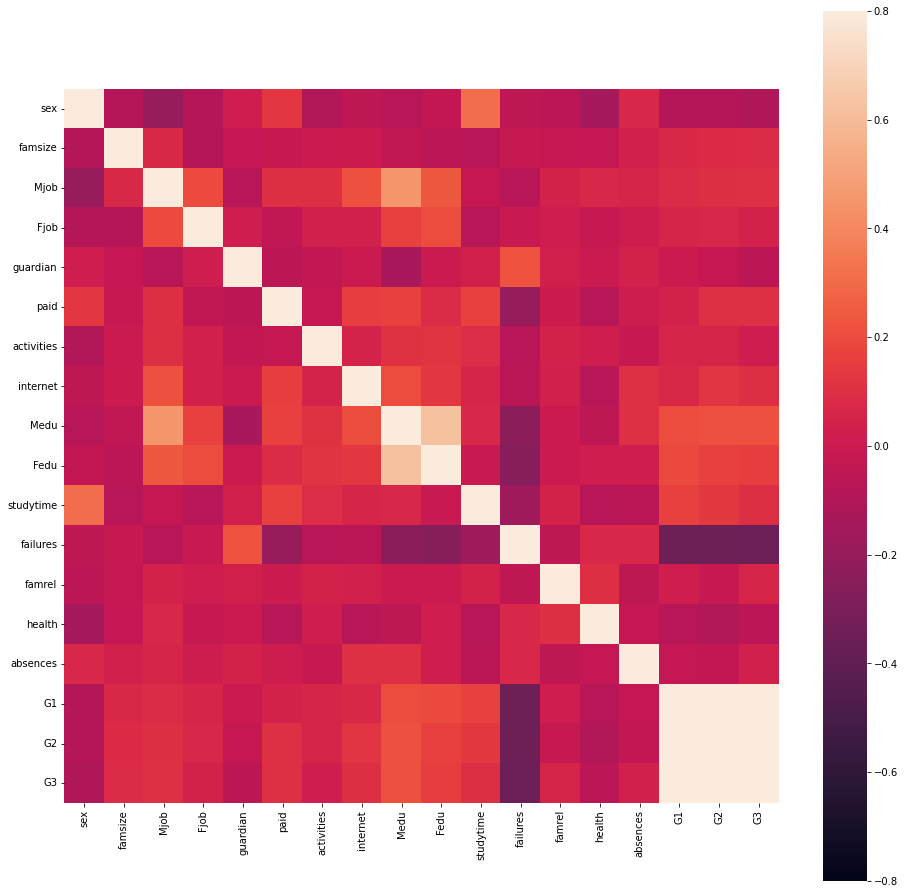

In [7]:
#Check correlation
matrix = train.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(matrix, vmax=.8, vmin=-.8, square=True, xticklabels=True, yticklabels=True)

In [8]:
#Create prediction set with G3 column and drop G1, G2, and G3 from feature set
y = train[['G3']]
y.G3 = y.G3.astype(float).fillna(0.0)
X = train.drop(['G3', 'G2', 'G1'], axis=1)

# Check prediction and feature set
print("Feature set")
print(X.head())
print(X.shape)
print("Prediction")
print(y.head())
print(y.shape)

Feature set
   sex  famsize  Mjob  Fjob  guardian  paid  activities  internet  Medu  Fedu  \
0    1        0     0     4         0     0           0         0     4     4   
1    1        0     0     2         1     0           0         1     1     1   
2    1        1     0     2         0     1           0         1     1     1   
3    1        0     1     3         0     1           1         1     4     2   
4    1        0     2     2         1     1           0         0     3     3   

   studytime  failures  famrel  health  absences  
0          2         0       4       3         6  
1          2         0       5       3         4  
2          2         3       4       3        10  
3          3         0       3       5         2  
4          2         0       4       5         4  
(395, 15)
Prediction
     G3
0   6.0
1   6.0
2  10.0
3  15.0
4  10.0
(395, 1)


In [9]:
#Fit model on feature_set and calculate RSS with OLS model
def process(feature_set):
  model = sm.OLS(y,X[list(feature_set)])
  regr = model.fit()
  predictions = regr.predict(X[list(feature_set)])
  RSS = 0
  for pred, true_y in zip(predictions, y['G3'].tolist()):
    RSS += (pred - true_y)**2
  return {"model":regr, "RSS":RSS}

In [10]:
#Returns the model with least RSS
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(process(combo))
    
    #Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    #Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    #Return the best model, along with some other useful information about the model
    return best_model

In [8]:
#Record best models for each # of features
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,X.shape[1]):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 15 models on 1 predictors in 0.14034032821655273 seconds.
Processed 105 models on 2 predictors in 1.1981844902038574 seconds.
Processed 455 models on 3 predictors in 1.3415935039520264 seconds.
Processed 1365 models on 4 predictors in 2.7880871295928955 seconds.
Processed 3003 models on 5 predictors in 6.4606242179870605 seconds.
Processed 5005 models on 6 predictors in 11.305251836776733 seconds.
Processed 6435 models on 7 predictors in 14.291786432266235 seconds.
Processed 6435 models on 8 predictors in 14.376900434494019 seconds.
Processed 5005 models on 9 predictors in 11.236593961715698 seconds.
Processed 3003 models on 10 predictors in 11.38060450553894 seconds.
Processed 1365 models on 11 predictors in 5.498457908630371 seconds.
Processed 455 models on 12 predictors in 1.0906412601470947 seconds.
Processed 105 models on 13 predictors in 0.2672557830810547 seconds.
Processed 15 models on 14 predictors in 0.04562783241271973 seconds.
Total elapsed time: 81.95347476005554

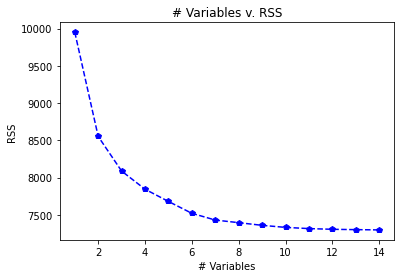

In [9]:
#Create graph to visualize # of features and RSS correlation
num_vars = [i for i in range(1, X.shape[1])] 
plt.title("# Variables v. RSS")
plt.xlabel('# Variables')
plt.ylabel('RSS')
plt.plot(num_vars, models_best['RSS'], marker='p', color='b', linestyle='--')

In [11]:
# The following are baseline regression models that are used to compare with the
# eventual classification neural network model

#Return mean squared error and accuracy
def mseAndAcc(y_pred, y_test):
  mse = 0
  correct = 0
  for y_p, y_actual in zip(y_pred, y_test):
    mse += (int(y_p) - int(y_actual))**2
    if int(y_p) == int(y_actual): correct += 1
  return [mse, int(correct/len(y_test)*100)]

In [13]:
#Baseline MLP Regressor Model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_test = np.array(y_test)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

#Print MSE and Accuracy
y_pred = regr.predict(X_test)
result = mseAndAcc(y_pred, y_test)
print("MSE:", result[0])
print("Accuracy %:", result[1])

MSE: 1738
Accuracy %: 12


In [12]:
#Baseline Linear Model
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)

#Print MSE and Accuracy
y_pred = reg.predict(X_test)
result = mseAndAcc(y_pred, y_test)
print("MSE:", result[0])
print("Accuracy %:", result[1])

MSE: 1686
Accuracy %: 14


In [13]:
#Baseline Lasso Model
from sklearn import linear_model
regression = linear_model.Lasso(alpha=0.1)
regression.fit(X_train, y_train)

#Print MSE and Accuracy
y_pred = regression.predict(X_test)
result = mseAndAcc(y_pred, y_test)
print("MSE:", result[0])
print("Accuracy %:", result[1])

MSE: 1598
Accuracy %: 18


In [15]:
#Baseline Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Fit Random Forest
forest = RandomForestRegressor(max_depth=3, random_state=0)
forest.fit(X_train, y_train)

#Print MSE and Accuracy
result = mseAndAcc(y_pred, y_test)
print("MSE:", result[0])
print("Accuracy %:", result[1])

MSE: 3996
Accuracy %: 20


In [ ]:
#
# Neural Network Classification Model
#

In [14]:
#split up values
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

y_test = np.array(y_test)
y_train = np.array(y_train)
x_test = np.array(x_test).T
x_train = np.array(x_train).T

m, n = x_train.shape

In [15]:
#activation functions
def ReLU(z):
  des = []
  for val in z:
    temp = []
    for v in val:
      temp.append(max(0, v))
    des.append(temp)
  return np.array(des)

def softMax(x):
  des = []
  for val in x:
    e_x = np.exp(val - np.max(val))
    des.append(e_x / e_x.sum(axis=0))
  return np.array(des)

#derivative of ReLU activation function
def deriv_ReLU(z):
  des = []
  for val in z:
    temp = []
    for v in val:
      if v > 0: temp.append(1)
      else: temp.append(0)
    des.append(temp)
  return np.array(des)

In [33]:
#initialize random weights and biases
def init_params(n_nodes):
  w1 = np.random.randn(15, n_nodes)
  b1 = np.random.randn(1, n_nodes)
  w2 = np.random.randn(n_nodes, 21)
  b2 = np.random.randn(1, 21)
  return w1, b1, w2, b2

#forward propagation
def forward_prop(w1, b1, w2, b2, x):
  z1 = np.dot(x.T, w1) + b1 
  a1 = ReLU(z1)
  z2 = np.dot(a1, w2) + b2
  a2 = softMax(z2)
  return z1, a1, z2, a2

#one hot function
def one_hot(y):
  one_hot_y = np.zeros((y.size, int(y.max()) + 1))
  for i, yy in enumerate(y):
    index = int(yy[0])
    one_hot_y[i][index] = 1
  return one_hot_y.T

#backward propagation
def back_prop(z1, a1, z2, a2, w2, x, y):
  dz2 = a2.T - one_hot(y)
  dw2 = 1 / n * dz2.dot(a1)
  db2 = 1 / n * np.sum(dz2, axis=1)
  dz1 = w2.dot(dz2) * deriv_ReLU(z1.T)
  dw1 = 1 / n * dz1.dot(x.T)
  db1 = 1 / n * np.sum(dz1, axis=1)
  return dw1.T, np.array([db1]), dw2.T, np.array([db2])

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
  w1 = w1 - alpha * dw1
  b1 = b1 - alpha * db1
  w2 = w2 - alpha * dw2
  b2 = b2 - alpha * db2
  return w1, b1, w2, b2

def get_predictions(a2):
  preds = []
  for value in a2:
    value = list(value)
    max_value = max(value)
    max_index = value.index(max_value)
    preds.append([max_index])
  return np.array(preds)

def get_accuracy(predictions, y):
  correct = 0
  for a, b in zip(predictions, y):
    if abs(int(a[0]) - int(b[0])) <= 0: correct += 1
  return correct/len(y)

def get_rss(predictions, y):
  RSS = 0
  for a, b in zip(predictions, y):
    RSS += (a - b) ** 2
  return RSS

In [50]:
#Gradient descent for optimizing weights and biases. Parameters: x, y, # of iterations, learning rate "alpha", # of nodes in hidden layer
def gradient_descent(x, y, iter, alpha, n_nodes):
  iteration, accuracy, rss = [], [], []
  w1, b1, w2, b2 = init_params(n_nodes)
  for i in range(iter):
    z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x_train)
    dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, x, y)
    w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
    acc = get_accuracy(get_predictions(a2), y)
    rss_value = get_rss(get_predictions(a2), y)
    #print training data accuracy every 500 iterations
    if (i%500 == 0):
      pass
      """
      print("Iteration:", i)
      print("Accuracy:", acc)
      print("RSS:", rss_value)
      """
    iteration.append(i)
    accuracy.append(acc)
    rss.append(rss_value)
  return w1, b1, w2, b2, iteration, accuracy, rss

w1, b1, w2, b2, iteration, accuracy, rss = gradient_descent(x_train, y_train, 2000, 0.1, 100)

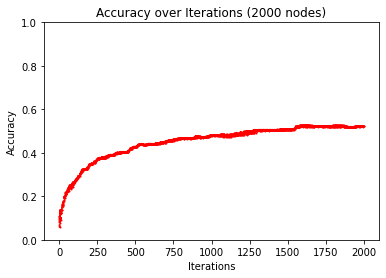

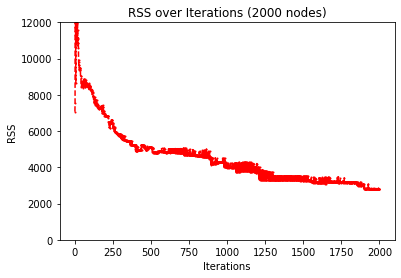

In [51]:
#Plot stats visually
def plot_data(x, x_name, y, y_name, n_nodes, figure, ylim):
  plt.figure(figure)
  plt.title(y_name + " over " + x_name + " ("+str(n_nodes)+" nodes)")
  plt.xlabel(x_name)
  plt.ylabel(y_name)

  ax = plt.gca()
  ax.set_ylim([0, ylim])

  plt.plot(x, y, linestyle='dashed', marker='o', color='red', markerfacecolor='red', markersize=1)

plot_data(iteration, "Iterations", accuracy, "Accuracy", 2000, 0, 1)
plot_data(iteration, "Iterations", rss, "RSS", 2000, 1, 12000)

In [41]:
#Show Confusion Matrix
from sklearn import metrics

def confusion_matrix(actual, predicted):
  act = []
  pred = []
  for i in actual:
    act.append(int(i))
  for i in predicted:
    pred.append(int(i))
  act = np.array(act)
  pred = np.array(pred)
  cm = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
  cm_display.plot()
  plt.show()

In [54]:
#Test on testing data
def checkPredictions(w1, b1, w2, b2, x_test, y_test):
  z1 = x_test.T.dot(w1) + b1
  a1 = ReLU(z1)
  z2 = np.dot(a1, w2) + b2
  a2 = softMax(z2)
  #print(y_test.flatten())
  #print(get_predictions(a2).flatten())
  #confusion_matrix(y_test.flatten(), get_predictions(a2).flatten())
  return get_accuracy(get_predictions(a2), y_test)

accuracy= checkPredictions(w1, b1, w2, b2, x_test, y_test)
print(accuracy)

0.1414141414141414


In [63]:
#Functions to check the results of differing values for # of hidden layer nodes and size of learning rate "alpha"

#checks results of differing alphas for 2000 iterations with 50 nodes
def check_all_alphas():
  for i in range(5):
    alpha = (i+1)/20.0
    w1, b1, w2, b2, iteration, accuracy, rss = gradient_descent(x_train, y_train, 2000, alpha, 50)
    print(str(alpha)+" alpha:", accuracy[-1]*100, "% accurate")
    print("Accuracy on test data:", checkPredictions(w1, b1, w2, b2, x_test, y_test)*100, "%\n")

#checks results of differing # of nodes for 2000 iterations with learning rate of 0.1
def check_all_nodes():
  for i in range(5):
    n_nodes = (i+1)*25
    w1, b1, w2, b2, iteration, accuracy, rss = gradient_descent(x_train, y_train, 2000, 0.1, n_nodes)
    print(str(n_nodes)+" nodes:", accuracy[-1]*100, "% accurate on training data")
    print("Accuracy on test data:", checkPredictions(w1, b1, w2, b2, x_test, y_test)*100, "%\n")

In [61]:
#Run to check accuracy with different nodes
check_all_nodes()

25 nodes
25 nodes: 33.78378378378378 % accurate on training data
Accuracy on test data: 20.2020202020202 %

50 nodes
50 nodes: 28.37837837837838 % accurate on training data
Accuracy on test data: 14.14141414141414 %

75 nodes
75 nodes: 48.64864864864865 % accurate on training data
Accuracy on test data: 18.181818181818183 %

100 nodes
100 nodes: 56.75675675675676 % accurate on training data
Accuracy on test data: 16.161616161616163 %

125 nodes
125 nodes: 58.78378378378378 % accurate on training data
Accuracy on test data: 14.14141414141414 %



In [64]:
#Run to check accuracy with different learning rates
check_all_alphas()

0.05 alpha: 62.83783783783784 % accurate
Accuracy on test data: 13.131313131313133 %

0.1 alpha: 47.97297297297297 % accurate
Accuracy on test data: 26.262626262626267 %

0.15 alpha: 38.513513513513516 % accurate
Accuracy on test data: 18.181818181818183 %

0.2 alpha: 36.14864864864865 % accurate
Accuracy on test data: 15.151515151515152 %

0.25 alpha: 31.08108108108108 % accurate
Accuracy on test data: 16.161616161616163 %

